## The Goal: read in data from previous simulations with CLUBB output (monthly) detailing wind variance and skewness. Save a few time averages out as pickle files for easier manipulation. 
Author: Meg D. Fowler <br>
Date: 10 Aug 2020<br><br>

In [1]:
# Load libraries

# Plotting utils 
import matplotlib.pyplot as plt 
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util

# Analysis
import Ngl
import numpy
import Nio
import os
import numpy as np 
import xarray as xr



In [2]:
# Set up directories 
dataDir   = '/glade/work/mdfowler/data/CLUBB_sim/'
nameStart = 'f.e20.FHIST.f09_f09.cesm2_1.001.cam.h0.'
nameEnd   = '_CLUBBwinds.nc'

decadeList = ['1951-59','1960-69', '1970-79','1980-89','1990-99','2000-14']


In [5]:
len(decadeList)

6

In [4]:
# Read in data by decade 
p0 = 1e5 
p0mb = 1000.
pnew = [1000,975,950,925,900,850,800]

for iDec in range(len(decadeList)):
    fileName = dataDir+nameStart+decadeList[iDec]+nameEnd
    dataDF   = xr.open_dataset(fileName)
    
    hyai = dataDF.hyai
    hybi = dataDF.hybi 
    
    PSfile = dataDir+nameStart+decadeList[iDec]+'_PS.nc'
    presDF = xr.open_dataset(PSfile)
    
    


## Testing section

In [5]:
fileName = dataDir+nameStart+decadeList[0]+nameEnd
dataDF   = xr.open_dataset(fileName) 

PSfile = dataDir+nameStart+decadeList[0]+'_PS.nc'
presDF = xr.open_dataset(PSfile)


In [6]:
dataDF

<xarray.Dataset>
Dimensions:    (ilev: 33, lat: 192, lon: 288, nbnd: 2, time: 108)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time       (time) object 1951-02-01 00:00:00 ... 1960-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    P0         float64 ...
    hyai       (ilev) float64 ...
    hybi       (ilev) float64 ...
    time_bnds  (time, nbnd) object ...
    PS         (time, lat, lon) float32 ...
    UP2_CLUBB  (time, ilev, lat, lon) float32 ...
    VP2_CLUBB  (time, ilev, lat, lon) float32 ...
    WP2_CLUBB  (time, ilev, lat, lon) float32 ...
    WP3_CLUBB  (time, ilev, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e20.FHIST.f09_f09.cesm2_1.001
    logname:           hannay
    host:              cheyenne5
    initial_file:      b.e21.BHIST.f09_g17.CMIP6-historical.001.cam.i.1950-01...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Fri Aug  7 13:56:59 2020: ncrcat -v UP2_CLUBB,VP2_CLUB...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [7]:
np.shape(dataDF.UP2_CLUBB)

(108, 33, 192, 288)

In [8]:
p0 = 1000.
pnew = [1000,975,950,925,900,850,800]

hyai = dataDF.hyai.values
hybi = dataDF.hybi.values

PS = presDF.PS
UP2 = dataDF.UP2_CLUBB


In [9]:
UP2_new = Ngl.vinth2p(UP2,hyai,hybi,pnew,PS,1,p0,1,False)

In [11]:
np.shape(UP2)

(108, 33, 192, 288)

In [12]:
np.shape(UP2_new)

(108, 7, 192, 288)

In [13]:
UP2_avg = np.nanmean(UP2,0)
UP2new_avg = np.nanmean(UP2_new,0)

np.shape(UP2_avg)

(33, 192, 288)

In [28]:
dataDF.ilev.values

array([   2.25523952,    5.03169186,   10.15794743,   18.55531707,
         29.7346756 ,   39.27300125,   47.11449891,   56.24049902,
         66.80049747,   80.70141822,   94.94104236,  111.6932109 ,
        131.40127063,  154.58680689,  181.86335266,  213.95282075,
        251.70441717,  296.11721635,  348.36658835,  409.83521938,
        482.14992881,  567.22442061,  652.33296901,  730.44589162,
        796.36307061,  845.35366669,  873.71586636,  900.32463148,
        924.96446241,  947.43233453,  967.53862454,  985.11219025,
       1000.        ])

In [29]:
UP2_avg_sfc = np.squeeze(UP2new_avg[1,:,:])

In [10]:
### Try plot

Text(0.5, 1.0, 'Zonal velocity variance (2nd lowest level; time mean, 1951-59)')

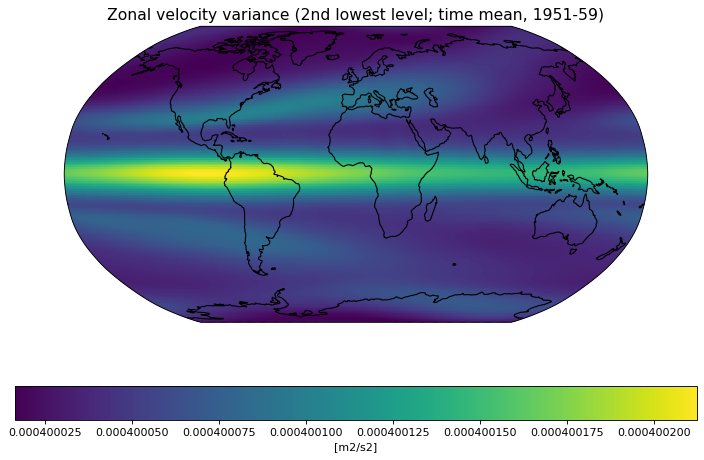

In [33]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
UP2avg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(UP2_avg[1,:,:]), dataDF.lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,dataDF.lat,UP2avg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[m2/s2]',orientation='horizontal')
ax.set_title('Zonal velocity variance (2nd lowest level; time mean, 1951-59)', fontsize=14)


Text(0.5, 1.0, 'Zonal velocity variance (975mb; time mean, 1951-59)')

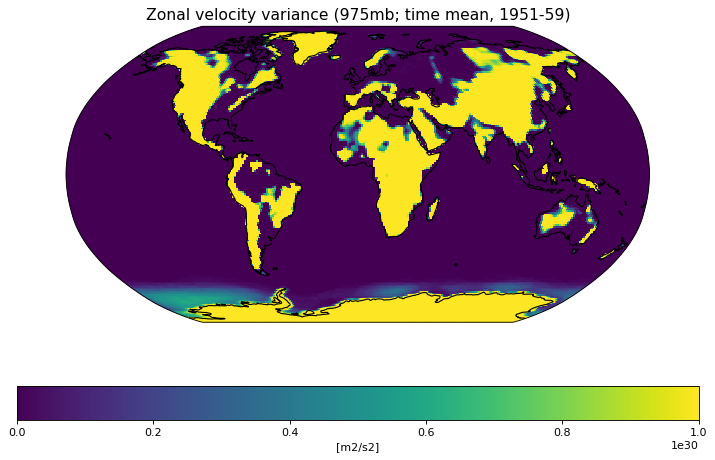

In [34]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
UP2avg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(UP2new_avg[1,:,:]), dataDF.lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,dataDF.lat,UP2avg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[m2/s2]',orientation='horizontal')
ax.set_title('Zonal velocity variance (975mb; time mean, 1951-59)', fontsize=14)

